<a href="https://colab.research.google.com/github/khodjasCode/predicted_prices_of_houses_ML/blob/main/multiple_lr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
df.head(10)

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000
5,"город Ташкент, Чиланзарский район, Чиланзар 6-...",Чиланзарский,1,28,1,4,25500
6,"город Ташкент, Чиланзарский район, Чиланзар-16",Чиланзарский,1,30,2,4,21200
7,"город Ташкент, Яккасарайский район, Саламатина",Яккасарайский,2,32,5,5,20000
8,"город Ташкент, Учтепинский район, Чиланзар-21",Учтепинский,2,51,3,4,26200
9,"город Ташкент, Чиланзарский район, Чиланзар-8",Чиланзарский,1,30,1,4,22200


In [ ]:
if df.isnull().sum().any():
  df = df.dropna()

In [ ]:
df = df[df.price != 'Договорная']

In [ ]:
df['price'] = pd.to_numeric(df['price']).astype(float)

In [ ]:
df.loc[df['size'] == 'Площадьземли:1сот', 'size'] = 100

In [ ]:
df['size'] = pd.to_numeric(df['size']).astype(float)

In [ ]:
import numpy as np

max_price = np.max(df['price'].values)  # Access the 'price' column and get its maximum value using NumPy
print(max_price)

52000000.0


In [ ]:
df = df[df.price != 52000000.0]

In [ ]:
df = df.drop(df.sort_values(by=['price'], ascending=False).head(15).index)

In [ ]:
df.describe()

,rooms,size,level,max_levels,price
count,7450.000000,7450.000000,7450.000000,7450.000000,7450.000000
mean,2.619597,113.455281,3.694094,6.024027,58517.746980
std,1.076104,1502.653680,2.237054,2.608131,43218.073962
min,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,50.000000,2.000000,4.000000,35000.000000
50%,3.000000,65.000000,3.000000,5.000000,46000.000000
75%,3.000000,85.000000,5.000000,9.000000,66452.500000
max,10.000000,70000.000000,19.000000,25.000000,425600.000000


In [ ]:
df['district'].value_counts()

,count
district,
Чиланзарский,1627
Мирзо-Улугбекский,1366
Юнусабадский,875
Учтепинский,874
Мирабадский,769
Яккасарайский,650
Яшнободский,467
Шайхантахурский,373
Олмазорский,266


In [ ]:
housing = df[df.district=='Чиланзарский']
housing.sample(5)

,location,district,rooms,size,level,max_levels,price
6946,"город Ташкент, Чиланзарский район, Алмазар",Чиланзарский,3,110.0,4,9,70000.0
1269,"город Ташкент, Чиланзарский район, Чиланзар кв...",Чиланзарский,2,42.0,4,4,31000.0
5600,"город Ташкент, Чиланзарский район, Чиланзар-Ц",Чиланзарский,2,50.0,4,4,33500.0
499,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,3,70.0,4,5,32000.0
464,"город Ташкент, Чиланзарский район, 3-й проезд ...",Чиланзарский,3,65.0,4,5,30000.0


ML

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.1, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
MLR_model = LinearRegression()

# x_train = np.asanyarray(train_set[['rooms', 'size', 'level', 'max_levels']])
x_train = np.asanyarray(train_set[['size', 'max_levels']])
y_train = np.asanyarray(train_set[['price']])

MLR_model.fit(x_train, y_train)

print('Coeffitcients: ', MLR_model.coef_)
print('theta0: ', MLR_model.intercept_)

Coeffitcients:  [[ 812.61325922 -117.54647203]]
theta0:  [-3316.67256829]


MODELNI BAHOLAYMIZ

In [ ]:
# x_test = np.asanyarray(test_set[['rooms', 'size', 'level', 'max_levels']])
x_test = np.asanyarray(test_set[['size', 'max_levels']])
y_test = np.asanyarray(test_set[['price']])

y_predict = MLR_model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [ ]:
mae = mean_absolute_error(y_test, y_predict)

mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 9763.748903666026
Root Mean Squared Error (RMSE): 19719.579250811646


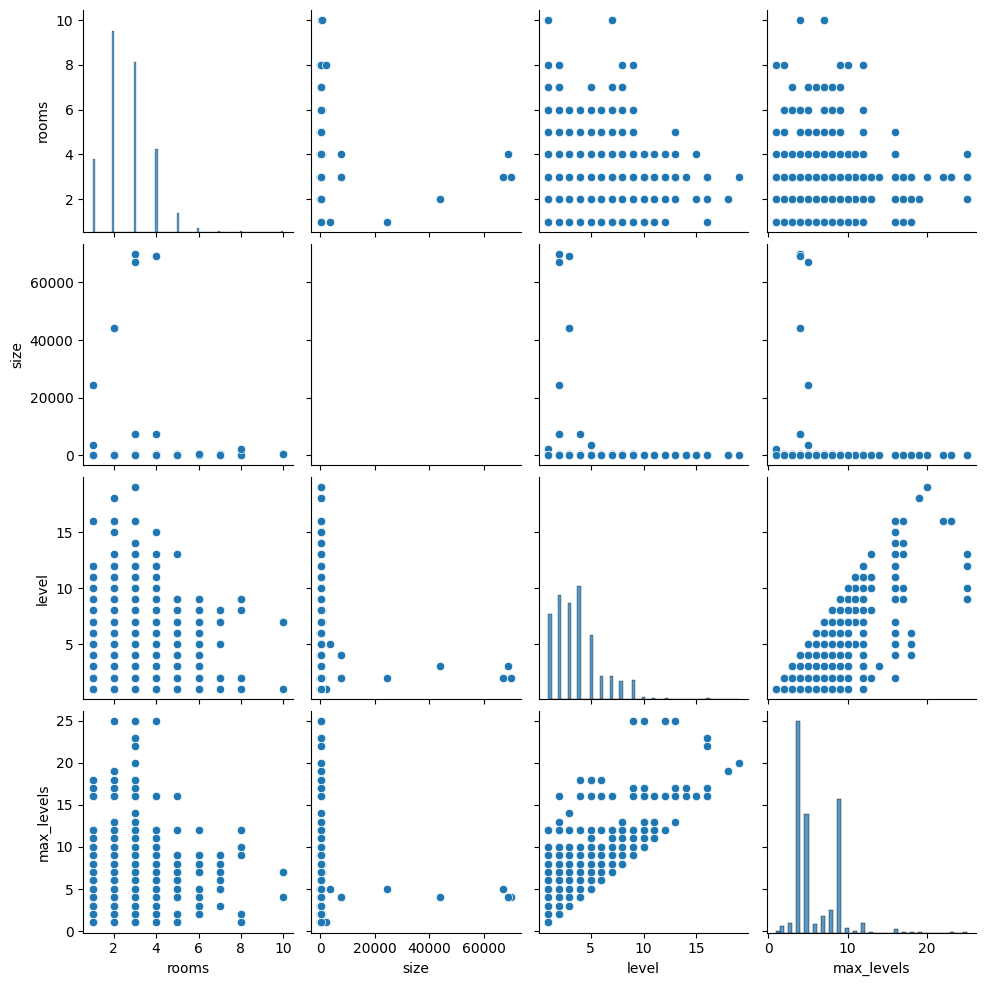

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.pairplot(df[['rooms', 'size', 'level', 'max_levels']])
plt.show()